In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
m_recent = engine.execute ('SELECT MAX(date) FROM Measurement').fetchall()
print(m_recent)

[('2017-08-23',)]


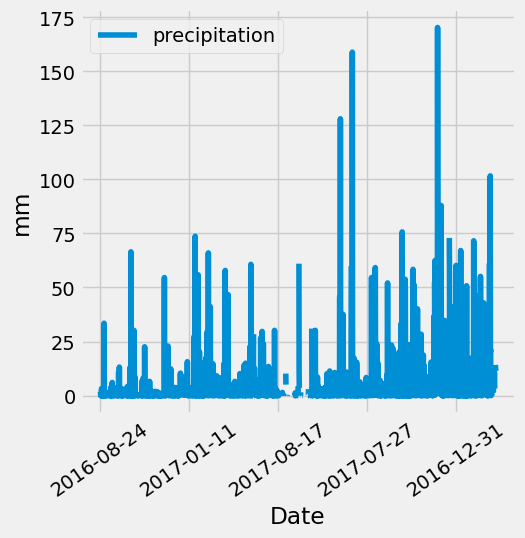

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#print(m_recent)
# Calculate the date one year from the last date in data set.
query_date = dt.date (2017,8,23) - dt.timedelta(days = 365)


# Perform a query to retrieve the data and precipitation scores
retrival = dt.date(2017,8,23) - dt.timedelta(days = 365)
precp = session.query(measurement.date, measurement.prcp).filter(measurement.date > retrival).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precp_df = pd.DataFrame(precp, columns=['date', 'precipitation'])
precp_df.set_index('date')
# Sort the dataframe by date
precp_df = precp_df.sort_index(ascending=True)
precp_df
# Use Pandas Plotting with Matplotlib to plot the data

precp_df.plot('date', 'precipitation')
plt.xlabel('Date')
plt.ylabel('mm')
plt.rcParams["figure.figsize"] = (10,10)
plt.xticks(rotation = 35)
plt.show()



In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data

precp_df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(12.2, 29.4, 22.03582251082252)]

Text(0.5, 4.183333333333314, 'Temperature')

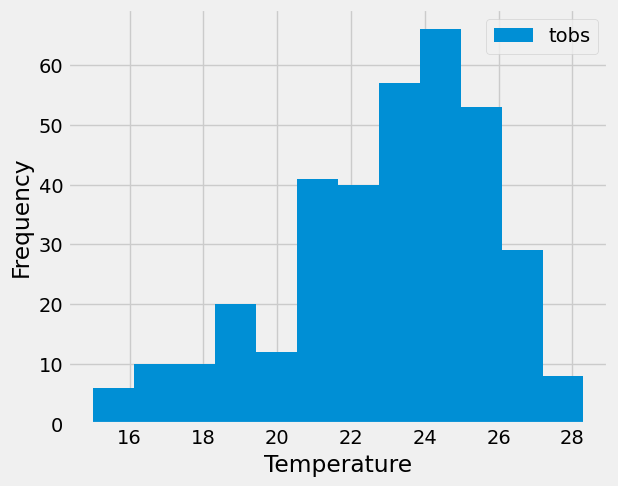

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()